In [156]:
from sklearn import datasets
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
random.seed(13)

In [157]:
X, y = datasets.make_blobs(n_samples=10000,n_features=2,
                           centers=3,cluster_std=0.38,
                           random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                test_size=0.33, random_state=42)

In [158]:
def one_hot(a):
  b = np.zeros((a.size, a.max()+1))
  b[np.arange(a.size), a] = 1
  return b

def cast_matrix(test_matrix, data_type):
    return list(map(lambda sub: list(map(data_type, sub)), test_matrix))

In [159]:
y_tr = one_hot(y_train)
y_tr = cast_matrix(y_tr, int)
y_tr = np.array(y_tr)

y_te = one_hot(y_test)
y_te = cast_matrix(y_te, int)
y_te = np.array(y_te)

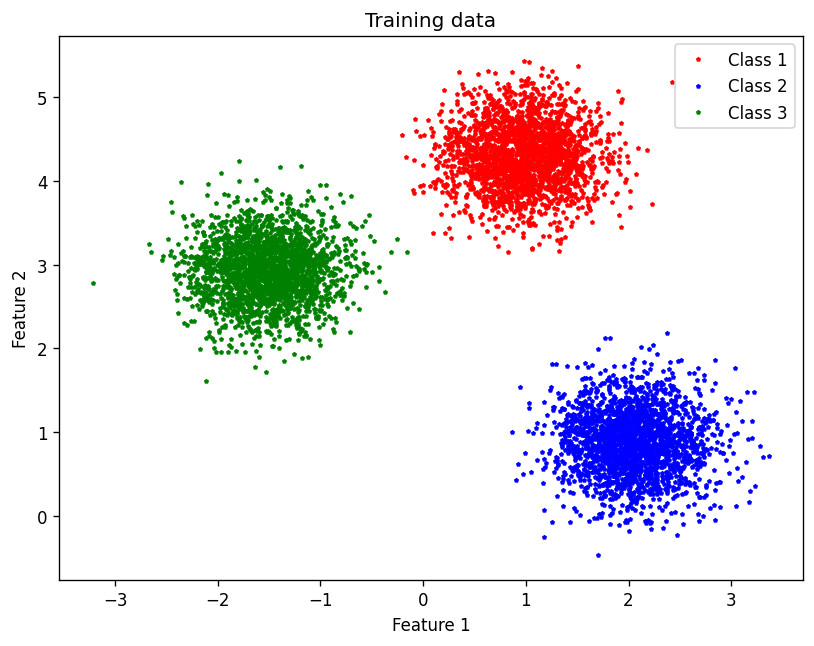

In [167]:
#Plot Training Data
fig = plt.figure(figsize=(8,6), dpi = 120)
plt.plot(X_train[:, 0][y_train == 0], X_train[:, 1][y_train == 0], 'rp', markersize = 2, label = 'Class 1')
plt.plot(X_train[:, 0][y_train == 1], X_train[:, 1][y_train == 1], 'bp', markersize = 2, label = 'Class 2')
plt.plot(X_train[:, 0][y_train == 2], X_train[:, 1][y_train == 2], 'gp', markersize = 2, label = 'Class 3')
plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title('Training data')
plt.show()

In [161]:
noOfClasses = 3

def activation(z):
  a = np.zeros((1, 3), dtype = int)
  idx = np.argmax(z)
  a[0][idx] = 1
  return a

def perceptron(X, y, epochs):
  m, n = X.shape
  theta = np.zeros((noOfClasses, n+1))
  theta_batch = np.zeros((noOfClasses, n+1))
  n_miss_list = []

  k = 0
  for i in range(n+1):
    theta[i][k in range(3)] = random.random()

  for epoch in range(epochs):
    n_miss = 0
    for idx, x_i in enumerate(X):
      x_i = np.insert(x_i, 0, 1).reshape(-1,1)
      y_hat = activation(np.dot(theta, x_i))
      comp = y_hat == y[idx]
      if (comp.all() == False):
        n_miss += 1
        act_idx = np.where(y[idx] > 0)
        pred_idx = np.where(y_hat > 0)
        theta_batch[act_idx[0][0]] += np.squeeze(x_i)
        theta_batch[pred_idx[0][0]] -= np.squeeze(x_i)
        # theta[act_idx[0][0]] += np.squeeze(x_i)
        # theta[pred_idx[0][0]] -= np.squeeze(x_i)
        # print(theta)
    n_miss_list.append(n_miss)
    theta = theta_batch/m

  return theta, n_miss_list

In [162]:
weights, miss_list = perceptron(X_train, y_tr, 5)

In [163]:
weights

array([[-0.66641791, -0.17696763, -1.27016875],
       [ 0.33432836,  0.68431721,  0.29559752],
       [ 0.33208955, -0.50734958,  0.97457123]])

In [164]:
def predict(theta, test):
  x_i = np.insert(test, 0, 1).reshape(-1,1)
  y_pred = activation(np.dot(theta, x_i))
  return y_pred

In [165]:
def func (X_test, y_test):
  y_pred = []
  n = 0
  for idx, ip in enumerate(X_test):
    y_hat = predict(weights, X_test[idx])[0]
    y_pred.append(y_hat)
    comp = y_test[idx] == y_hat
    if comp.all():
      n += 1
  return n, y_pred
miss, y_pred = func(X_test, y_te)


y_pre = []
p, q = y_te.shape
for j in range(p):
  y_pre.append((np.where(y_pred[j] > 0))[0][0])
y_pre = np.array(y_pre)               # to be used
y_true=np.argmax(y_te, axis=-1)       # to be used

In [166]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true.tolist(), y_test)
print(cm)

[[1099    0    0]
 [   0 1093    0]
 [   0    0 1108]]


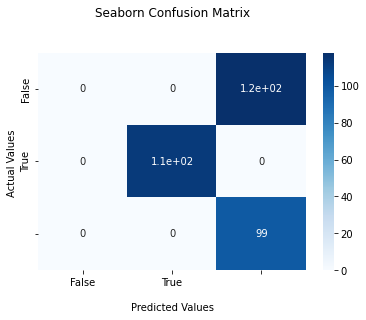

In [85]:
import seaborn as sns

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()